In [65]:
import pandas as pd
import numpy as np
from services import validate
import matplotlib.pyplot as plt

In [66]:
with open("./data/words.txt") as f:
    words = f.readlines()

In [67]:
cols = []
for col in np.arange(5):
    cols.append(f"c{col}")

df = pd.DataFrame(columns = cols)
for idx, word in enumerate(words):
    print(f"{idx+1}/{len(words)}", end="\r")
    df = pd.concat([df, pd.DataFrame([list(word.strip())], columns=cols)], ignore_index = True, axis = 0)

In [68]:
validate("hello", "world")

(False, '02010')

In [69]:
df[df.eq("e").any(1)].shape

(1057, 5)

In [70]:
word = "hello"
guess = "cello"

In [71]:
constraints = validate(word, guess)

In [72]:
ud = filteredSearch(df.drop(index=guessIdx).reset_index(), constraints[1], guess)

In [73]:
2/

SyntaxError: invalid syntax (3005678696.py, line 1)

In [74]:
filteredSearch(df.drop(index=guessIdx).reset_index(), constraints, guess)

,c0,c1,c2,c3,c4
0,a,b,a,c,k
1,a,b,a,s,e
2,a,b,a,t,e
3,a,b,b,e,y
4,a,b,b,o,t
...,...,...,...,...,...
2310,y,o,u,n,g
2311,y,o,u,t,h
2312,z,e,b,r,a
2313,z,e,s,t,y


In [75]:
def filteredSearch(df, constraints, guess):
    cols = []
    for col in np.arange(5):
        cols.append(f"c{col}")
    filtered = df
    for idx, constrain in enumerate(list(constraints)):
        if(constrain=="2"):
            filtered = filtered[filtered.eq(guess[idx]).any(1)]
        if(constrain=="1"):
            filtered = filtered[filtered[f"c{idx}"]==guess[idx]]
        if(constrain=="0"):
            filtered = filtered[filtered[f"c{idx}"]!=guess[idx]]
    return filtered.reset_index()[cols]

In [76]:
filteredSearch(df, constraints, guess)

,c0,c1,c2,c3,c4
0,a,b,a,c,k
1,a,b,a,s,e
2,a,b,a,t,e
3,a,b,b,e,y
4,a,b,b,o,t
...,...,...,...,...,...
2311,y,o,u,n,g
2312,y,o,u,t,h
2313,z,e,b,r,a
2314,z,e,s,t,y


In [77]:
guessIdx = np.random.randint(df.shape[0])

In [78]:
"".join(df.iloc[guessIdx].tolist())

'debug'

In [79]:
df.drop(index=guessIdx).iloc[guessIdx]

c0    d
c1    e
c2    b
c3    u
c4    t
Name: 526, dtype: object

In [80]:
def guessWordle(df, word):
    isDone = False
    count = 0
#     print(f"Word: {word}")
    while(isDone==False):
        guessIdx = np.random.randint(df.shape[0])
        guess = "".join(df.iloc[guessIdx].tolist())
#         print(f"Guess: {guess}; Search Space: {df.shape[0]}")
        isDone, constraints = validate(word, guess)
        df = filteredSearch(df.drop(index=guessIdx).reset_index(), constraints, guess)
        count+=1
    
    return count
    

In [100]:
guesses = []
for game in range(5):
    for idx, word in enumerate(words):
        print(f"{idx+1}/{len(words)}", end="\r")
        guesses.append(guessWordle(df, word.strip()))

(array([6060., 5472.,   48.,    0.]),
 array([ 0,  6, 12, 18, 24]),
 <BarContainer object of 4 artists>)

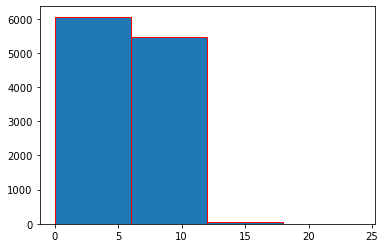

In [101]:
plt.hist(guesses, edgecolor="red", bins=np.arange(0, 30, 6))

(array([  0.,   1.,  51., 221., 387., 518., 466., 336., 173., 100.,  35.,
         18.,   6.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

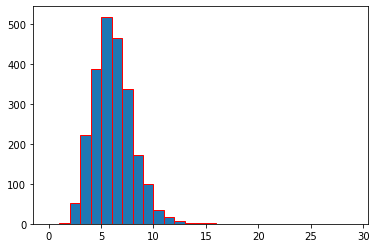

In [99]:
plt.hist(guesses, edgecolor="red", bins=np.arange(0, 30, 1))

(array([0.000e+00, 4.000e+00, 2.360e+02, 1.080e+03, 2.107e+03, 2.633e+03,
        2.265e+03, 1.546e+03, 9.000e+02, 4.490e+02, 2.200e+02, 9.200e+01,
        3.200e+01, 1.000e+01, 5.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <BarContainer object of 29 artists>)

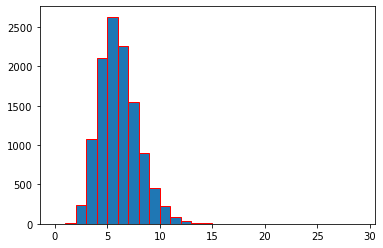

In [102]:
plt.hist(guesses, edgecolor="red", bins=np.arange(0, 30, 1))

In [89]:
853/2309

0.3694239930705933

In [103]:
np.array(guesses)

array([6, 7, 5, ..., 9, 6, 7])

In [105]:
np.mean(np.array(guesses))

5.5936096718480135

In [52]:
df.shape

(2316, 5)

In [63]:
p = (ud.shape[0]-1)/df.shape[0]

In [64]:
p * np.log(1/p)

0.003345249066793128

In [87]:
1178/df.shape[0]

0.5086355785837651

In [109]:
for item in df.iteritems():
    print(item)
    

('c0', 0       a
1       a
2       a
3       a
4       a
       ..
2311    y
2312    y
2313    z
2314    z
2315    z
Name: c0, Length: 2316, dtype: object)
('c1', 0       b
1       b
2       b
3       b
4       b
       ..
2311    o
2312    o
2313    e
2314    e
2315    o
Name: c1, Length: 2316, dtype: object)
('c2', 0       a
1       a
2       a
3       b
4       b
       ..
2311    u
2312    u
2313    b
2314    s
2315    n
Name: c2, Length: 2316, dtype: object)
('c3', 0       c
1       s
2       t
3       e
4       o
       ..
2311    n
2312    t
2313    r
2314    t
2315    a
Name: c3, Length: 2316, dtype: object)
('c4', 0       k
1       e
2       e
3       y
4       t
       ..
2311    g
2312    h
2313    a
2314    y
2315    l
Name: c4, Length: 2316, dtype: object)
